In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x

In [2]:
x.Xset.chatter = 0
#x.Xset.logChatter = 25
logFile = x.Xset.openLog("newLogFile.txt")

# $\lambda (T)$

Make:

In [366]:
%run -i 'utils/ave_lines.py'

temps = np.logspace(np.log10(0.1), np.log10(12), 1001)
flux_photons = temps * 0
count_rate = temps * 0
npdot = temps * 0
av_en = temps * 0

telname, t5 = 'Chandra/ACIS-OLD', 'Chandra_ACIS-OLD'
#telname, t5 = 'XMM-Newton/MOS', 'XMM-Newton_MOS'
#telname, t5 = 'SRG/eROSITA', 'SRG_eROSITA'
#telname, t5 = 'Chandra/ACIS-2002', 'Chandra_ACIS-2002'
                    
df = pd.DataFrame([])

for i in range(0, len(temps)):
    
    flux_photons[i], count_rate[i], npdot[i], av_en[i] = calc_l_T(temps[i], 0.3, 10.0, telname, Xplot=False)
                        
    df2 = (pd.DataFrame([[temps[i], flux_photons[i], count_rate[i], npdot[i], av_en[i]]], index=None))
    
    df = pd.concat([df, df2])

df.to_csv('l(T)/l(T)_'+t5+'.csv', sep=' ', header=False, index=False)

Read:

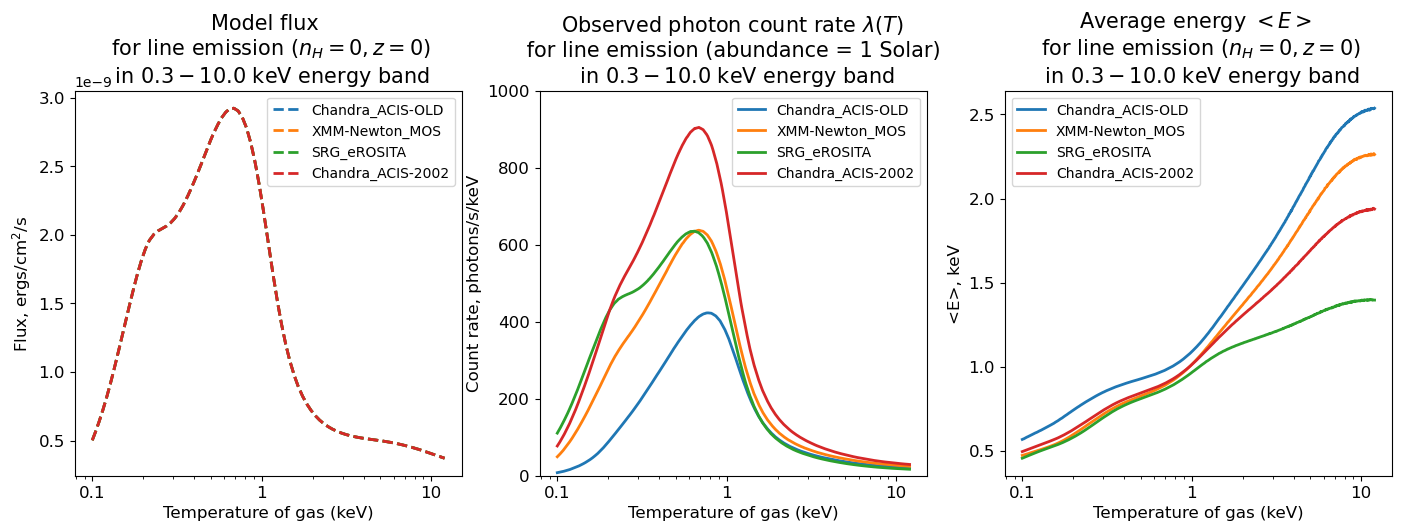

In [367]:
%run -i 'utils/ave_lines.py'

telescopes = ('Chandra_ACIS-OLD', 'XMM-Newton_MOS', 'SRG_eROSITA', 'Chandra_ACIS-2002')

plt.figure(figsize=(17,5))
    
lower_lin = '3'  
band_lin = ' \n in $0.'+lower_lin+'-10.0$ keV energy band'

for t in telescopes:
    
    #read_lT = pd.read_csv("../data_stats/stats_"+str(t)+".dat", header=None, delimiter=' ')
    #temps1 = read_lT[2].values
    #flux_photons1 = read_lT[0].values
    #count_rate1 = read_lT[11].values
    #npdot1 = read_lT[10].values#/read_lT[8].values
    
    read_lT = pd.read_csv("l(T)/l(T)_"+str(t)+"_"+lower_lin+".csv", header=None, delimiter=' ')
    temps1 = read_lT[0].values
    flux_photons1 = read_lT[1].values
    count_rate1 = read_lT[2].values
    npdot1 = read_lT[3].values
    av_en1 = read_lT[4].values

    plt.subplot(131)
    plt.plot(temps1, flux_photons1, linestyle='--', label=str(t), linewidth=2)
    plt.ylabel('Flux, ergs/cm$^2$/s', fontsize = 12)
    plt.title('Model flux \n for line emission ($n_H = 0, z = 0$)'+band_lin, fontsize = 15)
    add_fancy()

    plt.subplot(132)
    plt.plot(temps1, count_rate1, label=str(t), linewidth=2)
    plt.ylim(0,1000)
    plt.ylabel('Count rate, photons/s/keV', fontsize = 12)
    plt.title('Observed photon count rate $\lambda(T)$ \n for line emission (abundance = 1 Solar)'+band_lin, fontsize = 15)
    add_fancy()

    plt.subplot(133)
    plt.plot(temps1, av_en1, label=str(t), linewidth=2)
    #plt.ylabel('(xVals $\cdot$ yVals), counts/s', fontsize = 12)
    plt.ylabel('<E>, keV', fontsize = 12)
    plt.title('Average energy $<E>$ \n for line emission ($n_H = 0, z = 0$)'+band_lin, fontsize = 15)
    plt.grid()
    #if t == 'SRG_eROSITA':
    #    plt.plot(temps1, npdot1, label=str(t)+' old', linewidth=2, linestyle='--')
    add_fancy()
    #plt.ylim(0, 3)
        
plt.show()

In [11]:
t_from_e(1.75, 'Chandra/ACIS-OLD')

2.8812784746013014

# $c (T)$

Make:

In [371]:
%run -i 'utils/avt_cont.py'

telescope, tt = 'Chandra/ACIS-OLD', 'Chandra_ACIS-OLD'
#telescope, tt = 'XMM-Newton/MOS', 'XMM-Newton_MOS'
#telescope, tt = 'SRG/eROSITA', 'SRG_eROSITA'
#telescope, tt = 'Chandra/ACIS-2002', 'Chandra_ACIS-2002'

df = pd.DataFrame([])

temps = np.logspace(np.log10(0.1), np.log10(16), 1001)
flux_photons = temps * 0
count_rate = temps * 0
npdot = temps * 0

for i in range(0, len(temps)):
    
    flux_photons[i], count_rate[i], npdot[i] = calc_c_T(temps[i], 0.3, 10.0, telescope, Xplot=False)
    
    df2 = (pd.DataFrame([[temps[i], flux_photons[i], count_rate[i], npdot[i]]], index=None))
    
    df = pd.concat([df, df2])
    
df.to_csv('c(T)/c(T)_'+tt+'_3.csv', sep=' ', header=False, index=False)

Read:

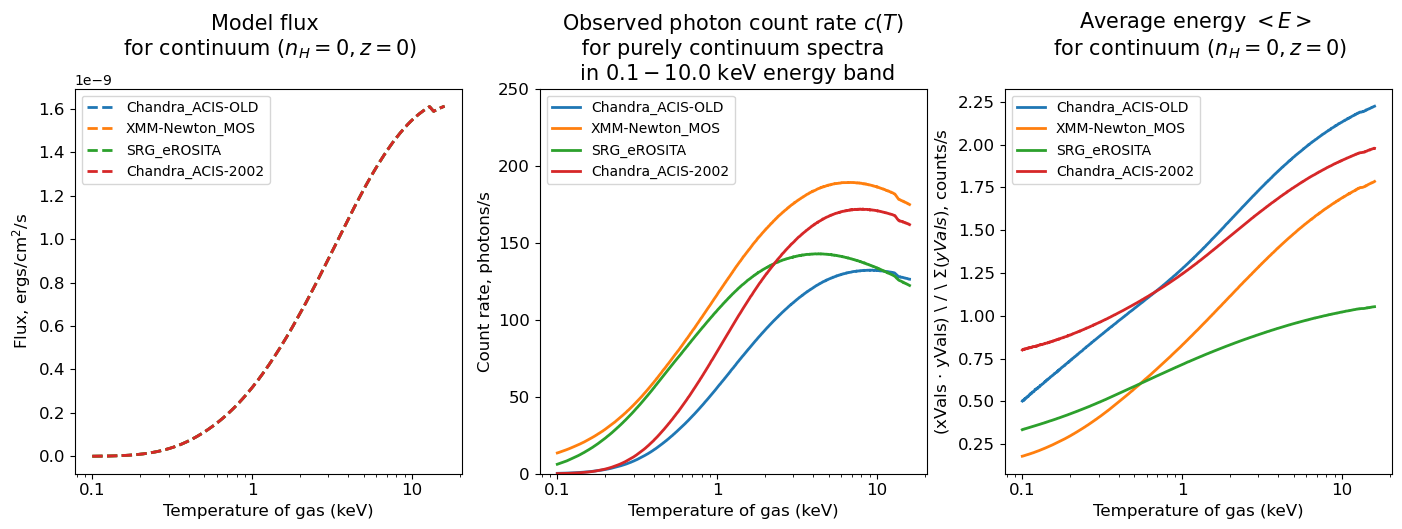

In [372]:
%run -i 'utils/avt_cont.py'

telescopes = ('Chandra_ACIS-OLD', 'XMM-Newton_MOS', 'SRG_eROSITA', 'Chandra_ACIS-2002')

plt.figure(figsize=(17,5))
    
lower_cont = '1'
band_cont = ' \n in $0.'+lower_cont+'-10.0$ keV energy band'

for t in telescopes:
    
    read_cT = pd.read_csv('c(T)/c(T)_'+str(t)+'_'+lower_cont+'.csv', header=None, delimiter=' ')
    temps = read_cT[0].values
    flux_photons = read_cT[1].values
    count_rate = read_cT[2].values
    npdot = read_cT[3].values
    
    plt.subplot(131)
    plt.plot(temps, flux_photons, linestyle='--', label=str(t), linewidth=2)
    plt.ylabel('Flux, ergs/cm$^2$/s', fontsize = 12)
    plt.title('Model flux \n for continuum ($n_H = 0, z = 0$) \n', fontsize = 15)
    add_fancy()
    
    plt.subplot(132)
    plt.plot(temps, count_rate, label=str(t), linewidth=2)
    plt.ylim(0,250)
    plt.ylabel('Count rate, photons/s', fontsize = 12)
    plt.title('Observed photon count rate $c(T)$ \n for purely continuum spectra'+band_cont, fontsize = 15)
    add_fancy()
    
    plt.subplot(133)
    plt.plot(temps, npdot, label=str(t), linewidth=2)
    plt.ylabel('(xVals $\cdot$ yVals) \ / \ $\Sigma(yVals)$, counts/s', fontsize = 12)
    plt.title('Average energy $<E>$ \n for continuum ($n_H = 0, z = 0$) \n', fontsize = 15)
    add_fancy()

plt.show()

# $ƒ_{line}$ (as flux and count rate) for Chandra in 0.7-10 keV

<Figure size 640x480 with 0 Axes>

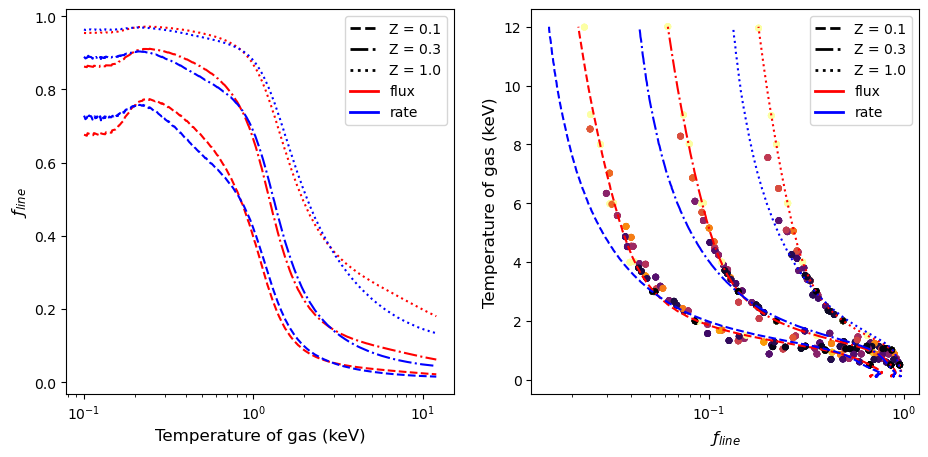

In [342]:
%run -i 'utils/ave_lines.py'
%run -i 'utils/avt_cont.py'

def handles():

    handles, labels = plt.gca().get_legend_handles_labels()
    l1 = Line2D([], [], label='Z = 0.1', color='black', linestyle='--', linewidth=2)
    l2 = Line2D([], [], label='Z = 0.3', color='black', linestyle='-.', linewidth=2)
    l3 = Line2D([], [], label='Z = 1.0', color='black', linestyle=':', linewidth=2)
    l4 = Line2D([], [], label='flux', color='red', linestyle='-', linewidth=2)
    l5 = Line2D([], [], label='rate', color='blue', linestyle='-', linewidth=2)
    #l6 = Line2D([], [], label='npdot', color='green', linestyle='-', linewidth=2)
    handles.extend([l1, l2, l3, l4, l5])
    plt.legend(handles=handles)

plt.figure(figsize=(11,5))

tempps = np.logspace(np.log10(0.1), np.log10(12), 501)

MODES = ('flux', 'rate')#, 'npdot')

for MODE in MODES:
    
    #plt.subplot(121)
    #plt.scatter(ttt, f_line('Chandra/ACIS-OLD', ttt, 'flux', 0.1))
    #plt.xscale('log')
    #plt.ylabel('$ƒ_{line}$', fontsize = 12)
    #plt.xlabel('Temperature (keV)', fontsize = 12)

    MODE_colors = ('red', 'blue')#, 'green')
    met_styles = ('--', '-.', ':')
    
    for met in (0.1, 0.3, 1.0):
        
        fff = [] # np.zeros(len(tempps))
        
        lnstl = met_styles[(0.1, 0.3, 1.0).index(met)]
        
        for ttt in tempps:
    
            fff.append(f_line('Chandra/ACIS-OLD', ttt, 7, MODE, met))

        plt.subplot(121)
        plt.plot(tempps, fff, color=MODE_colors[MODES.index(MODE)], linestyle = lnstl)
        plt.xscale('log')
        plt.ylabel('$ƒ_{line}$', fontsize = 12)
        plt.xlabel('Temperature of gas (keV)', fontsize = 12)
        handles()

        plt.subplot(122)
        plt.plot(fff, tempps, color=MODE_colors[MODES.index(MODE)], linestyle = lnstl)
        plt.xscale('log')
        plt.xlabel('$ƒ_{line}$', fontsize = 12)
        plt.ylabel('Temperature of gas (keV)', fontsize = 12)
        handles()
        
        check_dirfit = 1
        
        if check_dirfit == 1:

            for metallicity in metallicities:

                for T_min, T_max in list(zip(T_mins, T_maxs)):

                    name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

                    fl1 = Flux_lines_f6[name_key]
                    fl2 = Flux_cont_f6[name_key]
                    fl3 = Flux_fit_f6[name_key]

                    ttttt = single_T_fit_f6[name_key]

                    #f___line = [a/(a+b) for a,b in zip(fl1, fl2)]
                    f___line = [1-a/b for a,b in zip(fl2, fl3)]

                    plt.scatter(f___line, ttttt, c=ttttt, cmap='inferno', s=15)

plt.show()

# Validating $ƒ_{line}$ with direct fit

In [276]:
all_data_fig6 = pd.read_csv(f'../data_fig6/Chandra_chi_norm=1_new.dat', sep=' ')
display(all_data_fig6)

N_rows = all_data_fig6.shape[0]
f_min = np.unique(all_data_fig6['$f_{min}$'])
N_fmins=len(f_min)

Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

metallicities = np.unique(all_data_fig6['$Z$'])
T_mins = all_data_fig6['$T_{min}$'][:int((N_rows+1)/3):N_fmins].values
T_maxs = all_data_fig6['$T_{max}$'][:int((N_rows+1)/3):N_fmins].values

for i in range(0, N_rows, len(f_min)):
    
    cr = all_data_fig6.iloc[i,:]

    name = str(cr['$Z$'])+': '+str(cr['$T_{min}$'])+'-'+str(cr['$T_{max}$'])

    all_rows_for_given_fmin = all_data_fig6.iloc[i:i+len(f_min)]

    Tspec_lines_f6[name] = all_rows_for_given_fmin['$T_{lines}$'].values
    Tspec_cont_f6[name] = all_rows_for_given_fmin['$T_{cont}$'].values
    single_T_fit_f6[name] = all_rows_for_given_fmin['$T_{spec}$'].values
    Flux_lines_f6[name] = all_rows_for_given_fmin['$F_{lines}$'].values
    Flux_cont_f6[name] = all_rows_for_given_fmin['$F_{cont}$'].values
    Flux_fit_f6[name] = all_rows_for_given_fmin['$F_{sum}$'].values

,$Z$,$T_{min}$,$T_{max}$,$f_{min}$,$T_{lines}$,$T_{cont}$,$T_{spec}$,$F_{lines}$,$F_{cont}$,$F_{sum}$
0,0.1,0.5,1.0,0.0,1.000117,0.997322,0.999789,1.035873e-08,3.159162e-10,5.233858e-10
1,0.1,0.5,1.0,0.2,0.934060,0.947663,0.930448,1.021939e-08,2.737879e-10,4.796474e-10
2,0.1,0.5,1.0,0.4,0.847205,0.881169,0.857721,1.018765e-08,2.317862e-10,4.404955e-10
3,0.1,0.5,1.0,0.6,0.741370,0.790669,0.717650,1.042628e-08,1.899907e-10,3.997487e-10
4,0.1,0.5,1.0,0.8,0.603979,0.664969,0.602466,1.105504e-08,1.491977e-10,3.667681e-10
...,...,...,...,...,...,...,...,...,...,...
211,1.0,3.0,12.0,0.2,5.910697,8.706136,7.551393,1.935145e-09,1.442288e-09,1.805264e-09
212,1.0,3.0,12.0,0.4,4.296298,6.520090,5.405160,1.992335e-09,1.294975e-09,1.679456e-09
213,1.0,3.0,12.0,0.6,3.651825,4.988346,4.251952,2.148296e-09,1.155238e-09,1.575611e-09
214,1.0,3.0,12.0,0.8,3.263707,3.841660,3.538416,2.325396e-09,1.025247e-09,1.491724e-09


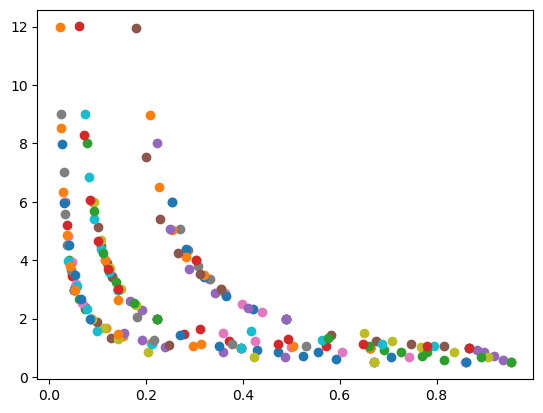

In [277]:
for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
        
        fl1 = Flux_lines_f6[name_key]
        fl2 = Flux_cont_f6[name_key]
        fl3 = Flux_fit_f6[name_key]
        
        ttttt = single_T_fit_f6[name_key]
        
        f___line = [1-a/b for a,b in zip(fl2, fl3)]
        
        plt.scatter(f___line, ttttt)

# Draw $\lambda(T)$ and $c(T)$ simultaneously

<Figure size 640x480 with 0 Axes>

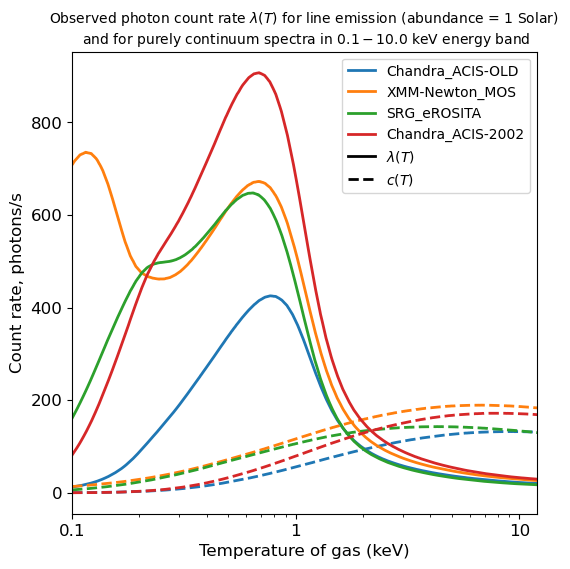

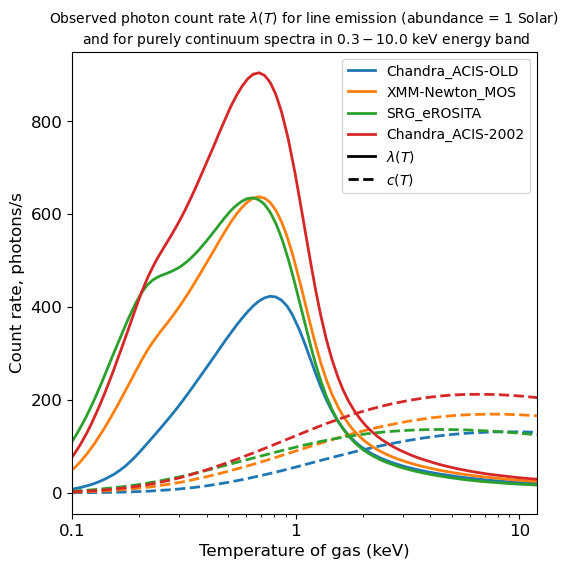

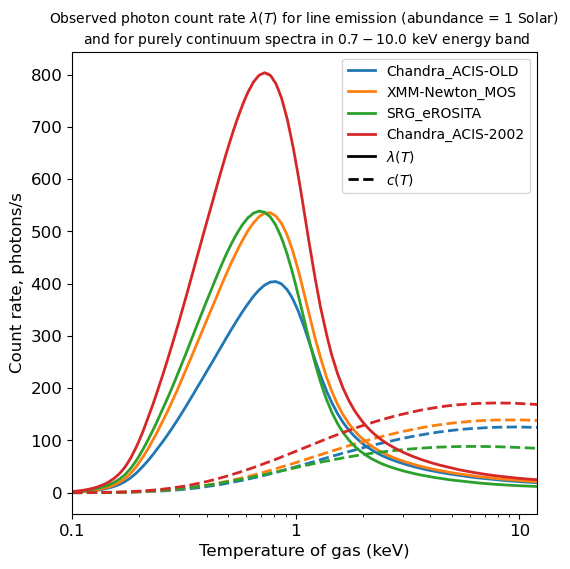

In [374]:
%run -i 'utils/ave_lines.py'

telescopes = ('Chandra_ACIS-OLD', 'XMM-Newton_MOS', 'SRG_eROSITA', 'Chandra_ACIS-2002')

def handles2():

    handles, labels = plt.gca().get_legend_handles_labels()
    l1 = Line2D([], [], label='Chandra_ACIS-OLD', color='#1f77b4', linestyle='-', linewidth=2)
    l2 = Line2D([], [], label='XMM-Newton_MOS', color='#ff7f0e', linestyle='-', linewidth=2)
    l3 = Line2D([], [], label='SRG_eROSITA', color='#2ca02c', linestyle='-', linewidth=2)
    l4 = Line2D([], [], label='Chandra_ACIS-2002', color='#d62728', linestyle='-', linewidth=2)
    l5 = Line2D([], [], label='$\lambda(T)$', color='black', linestyle='-', linewidth=2)
    l6 = Line2D([], [], label='$c(T)$', color='black', linestyle='--', linewidth=2)
    handles.extend([l1, l2, l3, l4, l5, l6])
    plt.legend(handles=handles, loc=1)


for lowerbound in('1', '3', '7'):
    
    plt.figure(figsize=(6,6))
    plt.title('Observed photon count rate $\lambda(T)$ for line emission (abundance = 1 Solar) \n and for purely continuum spectra in $0.'+lowerbound+'-10.0$ keV energy band', fontsize = 10)

    for t in telescopes:

        #read_lT = pd.read_csv("../data_stats/stats_"+str(t)+".dat", header=None, delimiter=' ')
        #temps1 = read_lT[2].values
        #flux_photons1 = read_lT[0].values
        #count_rate1 = read_lT[11].values
        #npdot1 = read_lT[10].values#/read_lT[8].values

        read_lT = pd.read_csv("l(T)/l(T)_"+str(t)+"_"+lowerbound+".csv", header=None, delimiter=' ')
        temps1 = read_lT[0].values
        flux_photons1 = read_lT[1].values
        count_rate1 = read_lT[2].values
        npdot1 = read_lT[3].values
        av_en1 = read_lT[4].values

        plt.subplot(111)
        p = plt.plot(temps1, count_rate1, linestyle='-', linewidth=2)
        plt.ylabel('Count rate, photons/s/keV', fontsize = 12)
        color1 = p[0].get_color()

        read_cT = pd.read_csv('c(T)/c(T)_'+str(t)+'_'+lowerbound+'.csv', header=None, delimiter=' ')
        temps = read_cT[0].values
        flux_photons = read_cT[1].values
        count_rate = read_cT[2].values
        npdot = read_cT[3].values

        plt.subplot(111)
        plt.plot(temps, count_rate, linewidth=2, linestyle='--', color = color1)
        plt.ylabel('Count rate, photons/s', fontsize = 12)

        plt.xlabel('Temperature of gas (keV)', fontsize = 12)
        plt.yticks(size=12)
        plt.xscale('log')
        #plt.yscale('log')
        plt.xticks([0.1, 1, 10], [0.1, 1, 10], size=12)
        plt.xlim(0.1, 12)
        #plt.yscale('log')
        #plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=12)
        #plt.ylim(0.01, 1000)
        handles2()

    plt.show()

# Draw $\langle E \rangle$ as function of gas temperature in 0.1-10 keV

<Figure size 640x480 with 0 Axes>

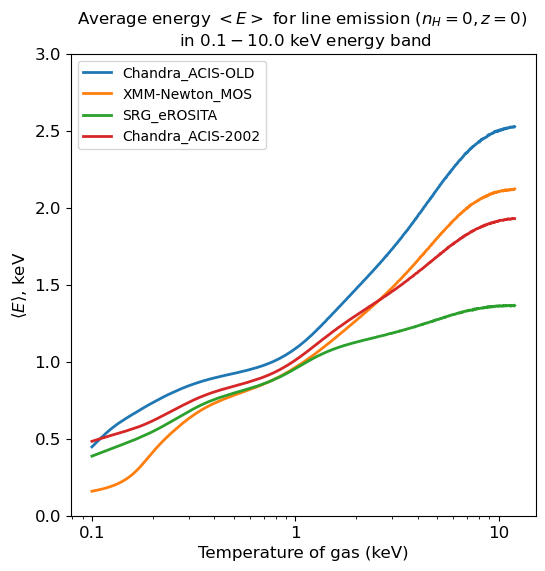

In [362]:
%run -i 'utils/ave_lines.py'

telescopes = ('Chandra_ACIS-OLD', 'XMM-Newton_MOS', 'SRG_eROSITA', 'Chandra_ACIS-2002')

lowerbound = '1'

plt.figure(figsize=(6,6))
plt.title('Average energy $<E>$ for line emission ($n_H = 0, z = 0$) \n in $0.'+lowerbound+'-10.0$ keV energy band', fontsize = 12)

for t in telescopes:
  
    read_lT = pd.read_csv("l(T)/l(T)_"+str(t)+"_"+lowerbound+".csv", header=None, delimiter=' ')

    plt.plot(read_lT[0].values, read_lT[4].values, label=str(t), linewidth=2)
    plt.ylabel('$\\langle E \\rangle$, keV', fontsize = 12)
    #if t == 'SRG_eROSITA':
    #    plt.plot(temps1, npdot1, label=str(t)+' old', linewidth=2, linestyle='--')
    add_fancy()
    plt.grid()
    plt.ylim(0, 3)
        
plt.show()

# Draw $c(T)$ depending on lower bound of energy band

<Figure size 640x480 with 0 Axes>

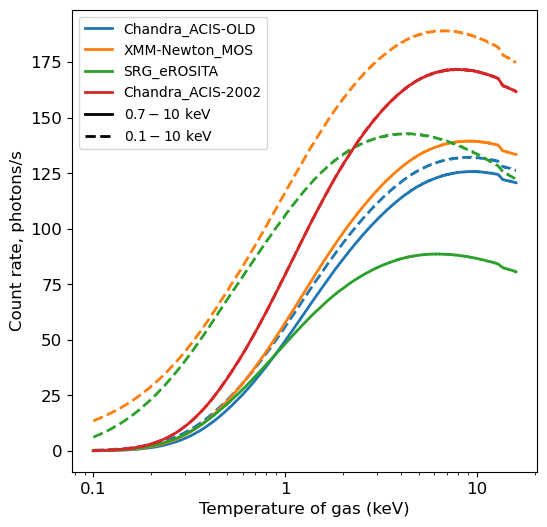

In [375]:
%run -i 'utils/avt_cont.py'

def handles1():

    handles, labels = plt.gca().get_legend_handles_labels()
    l1 = Line2D([], [], label='Chandra_ACIS-OLD', color='#1f77b4', linestyle='-', linewidth=2)
    l2 = Line2D([], [], label='XMM-Newton_MOS', color='#ff7f0e', linestyle='-', linewidth=2)
    l3 = Line2D([], [], label='SRG_eROSITA', color='#2ca02c', linestyle='-', linewidth=2)
    l4 = Line2D([], [], label='Chandra_ACIS-2002', color='#d62728', linestyle='-', linewidth=2)    
    l5 = Line2D([], [], label='$0.7-10$ keV', color='black', linestyle='-', linewidth=2)
    l6 = Line2D([], [], label='$0.1-10$ keV', color='black', linestyle='--', linewidth=2)
    handles.extend([l1, l2, l3, l4, l5, l6])
    plt.legend(handles=handles, loc=2)

telescopes = ('Chandra_ACIS-OLD', 'XMM-Newton_MOS', 'SRG_eROSITA', 'Chandra_ACIS-2002')

plt.figure(figsize=(6,6))
#plt.suptitle('Observed photon count rate $c(T)$ for purely continuum spectra', fontsize = 15)

for t in telescopes:
            
    plt.subplot(111)
    read_cT = pd.read_csv('c(T)/c(T)_'+str(t)+'_7.csv', header=None, delimiter=' ')
    p = plt.plot(read_cT[0].values, read_cT[2].values, linewidth=2, linestyle='-')
    plt.ylabel('Count rate, photons/s', fontsize = 12)
    #plt.title('Observed photon count rate $c(T)$ \n for purely continuum spectra \n', fontsize = 15)
    color1 = p[0].get_color()
            
    plt.subplot(111)
    read_cT = pd.read_csv('c(T)/c(T)_'+str(t)+'_1.csv', header=None, delimiter=' ')
    plt.plot(read_cT[0].values, read_cT[2].values, linewidth=2, linestyle='--', color = color1)
    plt.ylabel('Count rate, photons/s', fontsize = 12)
    #plt.title('Observed photon count rate $c(T)$ \n for purely continuum spectra \n', fontsize = 15)
    
    plt.xlabel('Temperature of gas (keV)', fontsize = 12)
    plt.yticks(size=12)
    plt.xscale('log')
    plt.xticks([0.1, 1, 10], [0.1, 1, 10], size=12)
    handles1()

plt.show()

# Draw $\langle E \rangle$ depending on lower bound of energy band

<Figure size 640x480 with 0 Axes>

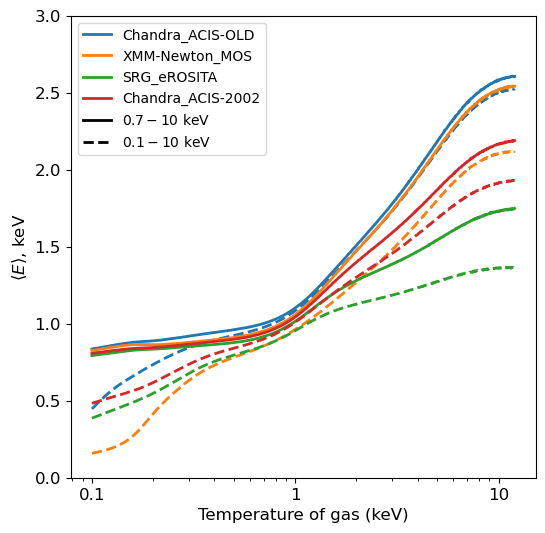

In [378]:
%run -i 'utils/ave_lines.py'

telescopes = ('Chandra_ACIS-OLD', 'XMM-Newton_MOS', 'SRG_eROSITA', 'Chandra_ACIS-2002')

plt.figure(figsize=(6,6))

for t in telescopes:
  
    read_lT = pd.read_csv("l(T)/l(T)_"+str(t)+"_7.csv", header=None, delimiter=' ')
    p = plt.plot(read_lT[0].values, read_lT[4].values, linewidth=2, linestyle='-')
    color1 = p[0].get_color()
    
    read_lT = pd.read_csv("l(T)/l(T)_"+str(t)+"_1.csv", header=None, delimiter=' ')
    plt.plot(read_lT[0].values, read_lT[4].values, linewidth=2, linestyle='--', color=color1)

plt.ylabel('$\\langle E \\rangle$, keV', fontsize = 12)
plt.xlabel('Temperature of gas (keV)', fontsize = 12)
plt.yticks(size=12)
plt.xscale('log')
plt.xticks([0.1, 1, 10], [0.1, 1, 10], size=12)
plt.ylim(0, 3)
handles1()
        
plt.show()

# Draw $ƒ_{line}$

<Figure size 640x480 with 0 Axes>

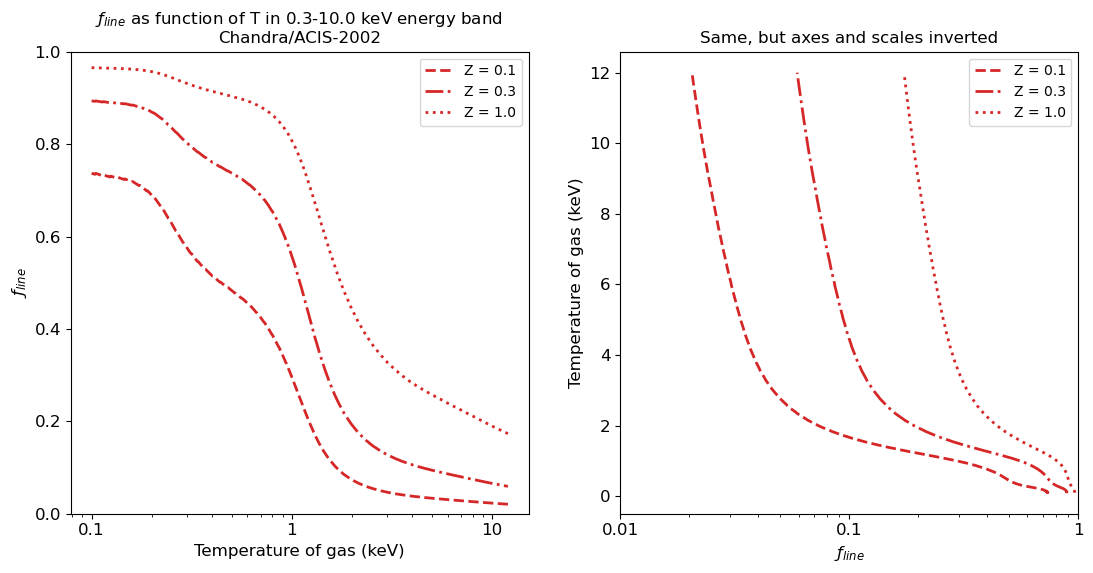

In [379]:
%run -i 'utils/ave_lines.py'
%run -i 'utils/avt_cont.py'

plt.figure(figsize=(13,6))

#tlscp, clr = 'Chandra/ACIS-OLD', '#1f77b4'
#tlscp, clr = 'XMM-Newton/MOS', '#ff7f0e'
#tlscp, clr = 'SRG/eROSITA', '#2ca02c'
tlscp, clr = 'Chandra/ACIS-2002', '#d62728'
 
lowerbound = 3

tempps = np.logspace(np.log10(0.1), np.log10(12), 501)
met_styles = ('--', '-.', ':')

for met in (0.1, 0.3, 1.0):

    fff = [] # np.zeros(len(tempps))

    lnstl = met_styles[(0.1, 0.3, 1.0).index(met)]

    for ttt in tempps:

        fff.append(f_line(tlscp, ttt, lowerbound, 'flux', met))

    plt.subplot(121)
    plt.title('$ƒ_{line}$ as function of T in 0.'+str(lowerbound)+'-10.0 keV energy band \n'+tlscp, fontsize=12)
    plt.plot(tempps, fff, color=clr, linestyle = lnstl, linewidth = 2, label = 'Z = '+str(met))
    plt.ylim(0, 1)
    #plt.xlim(0.1,12)
    plt.xlabel('Temperature of gas (keV)', fontsize = 12)
    plt.ylabel('$ƒ_{line}$', fontsize = 12)
    plt.xscale('log')
    plt.xticks([0.1, 1, 10], [0.1, 1, 10], size=12)
    plt.yticks(size=12)
    plt.legend()
    
    plt.subplot(122)
    plt.title('Same, but axes and scales inverted', fontsize=12)
    plt.plot(fff, tempps, color=clr, linestyle = lnstl, linewidth = 2, label = 'Z = '+str(met))
    plt.xlabel('$ƒ_{line}$', fontsize = 12)
    plt.ylabel('Temperature of gas (keV)', fontsize = 12)
    plt.xlim(0.01, 1)
    #plt.ylim(0.1, 12.1)
    plt.xscale('log')
    plt.yscale('linear')
    plt.xticks([0.01, 0.1, 1], [0.01, 0.1, 1], size=12)
    plt.yticks(size=12)
    plt.legend()
    
plt.show()

In [307]:
f_line('Chandra/ACIS-2002', 8, 7, 'rate', 0.1)
f_line('Chandra/ACIS-2002', 8, 7, 'flux', 0.1)

0.02710956939170658

# Draw effective area vs. energy

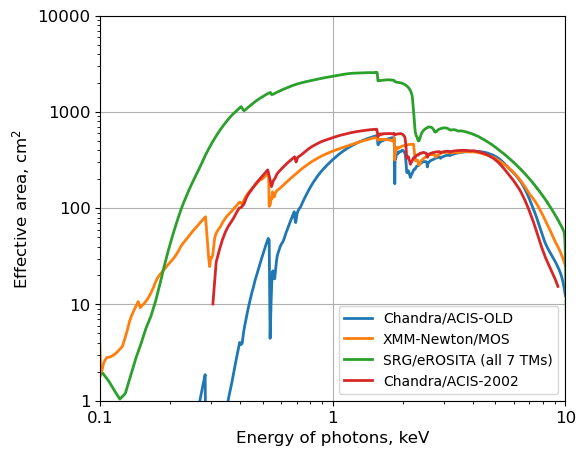

In [380]:
def draw_eff(T, telescope_name, Xplot=False):
    
    # calculating photon count rate for continuum
    
    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=1024)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra/ACIS-OLD':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    elif telescope_name == 'Chandra/ACIS-NEW':
        RMF_NAME = 'telescopes/acis/acisi.rmf'
        ARF_NAME = 'telescopes/acis/acisi_namp_qc.arf'
    elif telescope_name == 'XMM-Newton/MOS':
        RMF_NAME = 'telescopes/xmm-newton/m1_thin1v9q19t5r5_all_15.rsp'
        ARF_NAME = ''
    elif telescope_name == 'Chandra/ACIS-2002':
        RMF_NAME = 'telescopes/chandra-2002/acisf03243_000N022_r0087_rmf3.fits'
        ARF_NAME = 'telescopes/chandra-2002/acisf03243_000N022_r0087_arf3.fits'  

    # set model for fakeit
    
    mod = x.Model('phabs*apec')
    mod.setPars(0.00, T, 0.0, 0, 1)
    x.AllModels.show()
    
    x.Plot.device = '/null'

    # fake spectrum
    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = '40000', 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)

    x.AllData.ignore(f"**-0.1 10.0-**")             # IMPORTANT !
    
    x.Plot.xAxis = "keV"
    #x.AllData.show()
    x.Plot("efficiency")
    xVals = x.Plot.x()
    yVals = x.Plot.y()
     
    return xVals, yVals

plt.figure(figsize=(6,5))

for t in ('Chandra/ACIS-OLD', 'XMM-Newton/MOS', 'SRG/eROSITA', 'Chandra/ACIS-2002'):
    x9, y9 = draw_eff(0.1, t, Xplot=False)
    if t == 'SRG/eROSITA':
        plt.plot(x9, [7*yyyyy for yyyyy in y9], label=t+' (all 7 TMs)', linewidth=2)
    else:
        plt.plot(x9, y9, label=t, linewidth=2)
    plt.xlabel('Energy of photons, keV', fontsize = 12)
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks([0.1, 1, 10], [0.1, 1, 10], size=12)
    plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], size=12)
    plt.ylabel('Effective area, cm$^2$', fontsize = 12)
    
plt.xlim(0.1, 10)
plt.ylim(1, 10000)
plt.legend(loc=4, fontsize=10)
plt.grid()
plt.show()